# Representation and Visualization of Data with Scikit learn

Machine learning is about fitting models to data; for that reason, we'll start by
discussing how data can be represented in order to be understood by the computer.  Along
with this, we'll build on our matplotlib examples from the previous section and show some
examples of how to visualize data.

## Data in scikit-learn

Data in scikit-learn, with very few exceptions, is assumed to be stored as a
**two-dimensional array**, of shape `[n_samples, n_features]`. Many algorithms also accept ``scipy.sparse`` matrices of the same shape.

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be Boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being "zeros" for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than NumPy arrays.

As we recall from the previous section (or Jupyter notebook), we represent samples (data points or instances) as rows in the data array, and we store the corresponding features, the "dimensions," as columns.

### A Simple Example: the Iris Dataset

As an example of a simple dataset, we're going to take a look at the iris data stored by scikit-learn.
The data consists of measurements of three different iris flower species.  There are three different species of iris
in this particular dataset as illustrated below:

Iris Setosa, Iris Versicolor, Iris Virginica
<br />
<img src="figures/iris_setosa.jpg" width="30%" style="padding: 0 15px; float: left;"/>

<img src="figures/iris_versicolor.jpg" width="30%" style="padding: 0 15px; float: left;"/>

<img src="figures/iris_virginica.jpg" width="30%" style="padding: 0 15px; float: left;"/>

Let's assume that we are interested in categorizing new observations; we want to predict whether unknown flowers are  Iris-Setosa, Iris-Versicolor, or Iris-Virginica flowers, respectively. Based on what we've discussed in the previous section, how would we construct such a dataset?

Remember: we need a 2D array of size `[n_samples x n_features]`.

- What would the `n_samples` refer to?

- What might the `n_features` refer to?

Remember that there must be a **fixed** number of features for each sample, and feature
number *j* must be a similar kind of quantity for each sample.

### Loading the Iris Data with Scikit-learn

The iris dataset is one of the datasets included in scikit-learn (others are here: http://scikit-learn.org/stable/datasets/#toy-datasets), so we can skip the steps of downloading it and importing it with pandas.


In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

The data consist of the following:
<img src="figures/petal_sepal.jpg" alt="Sepal" style="width: 30%; float: right"/>
- Features in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm


- Target classes to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica


The resulting dataset is a ``Bunch`` object: you can see what's available using
the method ``keys()``:

In [2]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

The features of each sample flower are stored in the ``data`` attribute of the dataset:

In [3]:
n_samples, n_features = iris.data.shape
print('Number of samples:', n_samples)
print('Number of features:', n_features)
# the sepal length, sepal width, petal length and petal width of the first sample (first flower)
print(iris.data[0])

Number of samples: 150
Number of features: 4
[5.1 3.5 1.4 0.2]


The information about the class of each sample is stored in the ``target`` attribute of the dataset:

In [4]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [5]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Using the NumPy's bincount function, we can see that the classes are distributed uniformly in this dataset - there are 50 flowers from each species, where

- class 0: Iris-Setosa
- class 1: Iris-Versicolor
- class 2: Iris-Virginica

In [6]:
import numpy as np

np.bincount(iris.target)

array([50, 50, 50])

These class names are stored in the last attribute, namely ``target_names``:

In [7]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


This data is four dimensional, but we can visualize one or two of the dimensions
at a time using a simple histogram or scatter-plot.  Again, we'll start by enabling
matplotlib inline mode:

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

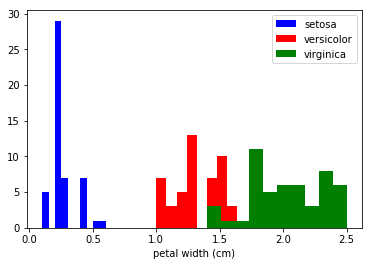

In [9]:
x_index = 3
colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.hist(iris.data[iris.target==label, x_index], 
             label=iris.target_names[label],
             color=color)

plt.xlabel(iris.feature_names[x_index])
plt.legend(loc='upper right')
plt.show()

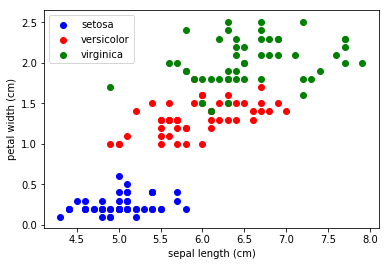

In [10]:
x_index = 0
y_index = 3

colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.scatter(iris.data[iris.target==label, x_index], 
                iris.data[iris.target==label, y_index],
                label=iris.target_names[label],
                c=color)

plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.legend(loc='upper left')
plt.show()

## Exercise

Change `x_index` and `y_index` in the above script and find a combination of two parameters which maximally separate the three classes.

This exercise is a preview of **dimensionality reduction**, which we'll do next.